In [1]:
import pandas as pd
import numpy as np

import re
import ftfy
import random
import math
from tqdm.notebook import tqdm, tqdm_notebook
from collections import Counter
import string


from wordcloud import WordCloud, ImageColorGenerator
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
plt.style.use('seaborn-poster')
plt.style.use('seaborn-talk')

import wordninja
from spellchecker import SpellChecker
from langdetect import detect
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from textblob import TextBlob


from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.tokenize.treebank import TreebankWordDetokenizer

from nltk.corpus import wordnet
import nltk
import emoji
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords

stop_words=set(stopwords.words('english'))
#print(stop_words)
print('Done')

C:\Users\fosha\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
C:\Users\fosha\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.o

Done


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fosha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fosha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\fosha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\fosha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\fosha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
df = pd.read_excel("359.xlsx")
df['Cited by'].fillna(0, inplace=True)   
df.head(5)

,Title,Year,Source title,Cited by,Link,Abstract,Author Keywords,Publisher
0,Evaluating the impact of urban design scenario...,2021,Sustainable Cities and Society,0.0,https://www.scopus.com/inward/record.uri?eid=2...,Walking accessibility planning is seen a power...,Accessibility; Exploratory scenarios; GIS; Ped...,Elsevier Ltd
1,Thinking together and governance in transport ...,2021,International Journal of E-Planning Research,0.0,https://www.scopus.com/inward/record.uri?eid=2...,Sustainability issues challenge most conventio...,Community Detection Algorithm; Implementation ...,IGI Global
2,Technoeconomic analysis and environmental impa...,2021,World Electric Vehicle Journal,0.0,https://www.scopus.com/inward/record.uri?eid=2...,"In recent decades, urban air pollution has inc...",Electric vehicles; Environmental impact; Life-...,MDPI AG
3,Multi-modal interactions on urban streets: New...,2021,Applied Geography,0.0,https://www.scopus.com/inward/record.uri?eid=2...,"New York, like many US cities has recently see...",Commercial vehicles; Gentrification; New York;...,Elsevier Ltd
4,Route prioritization of urban public transport...,2021,Renewable and Sustainable Energy Reviews,1.0,https://www.scopus.com/inward/record.uri?eid=2...,Electric vehicles have attracted increasing in...,Buses; CO2 emissions; Electric vehicle; Multi-...,Elsevier Ltd


In [3]:
df_year=df.groupby(df['Year']).agg(
                        number_of_publication=pd.NamedAgg(column='Title',aggfunc='count'),
                        total_citation=pd.NamedAgg(column='Cited by',aggfunc=sum),
                        mean_citation=pd.NamedAgg(column='Cited by',aggfunc='mean'),

                                   )
df_year

,number_of_publication,total_citation,mean_citation
Year,,,
2015,31,581.0,18.741935
2016,25,435.0,17.400000
2017,41,455.0,11.097561
2018,40,564.0,14.100000
2019,54,616.0,11.407407
2020,96,548.0,5.708333
2021,71,46.0,0.647887


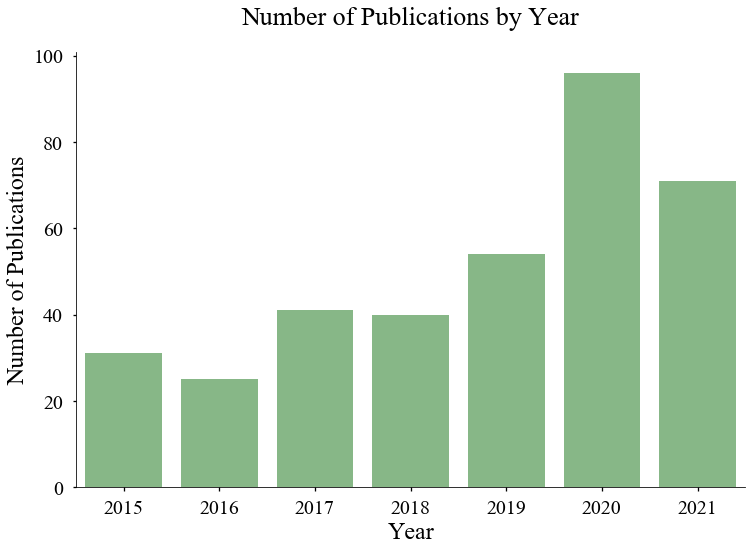

In [4]:

plt.figure(figsize=(12,8))

public=sns.barplot(x=df_year.index, y="number_of_publication", data=df_year,ci=None,
                 color="green",alpha=.5)

public.set_xlabel("Year", fontsize = 24)
public.set_ylabel("Number of Publications", fontsize = 24)
public.set_title("Number of Publications by Year", fontsize = 26,y=1.05)
public.tick_params(axis='both',labelsize=20)
sns.despine()
plt.show()

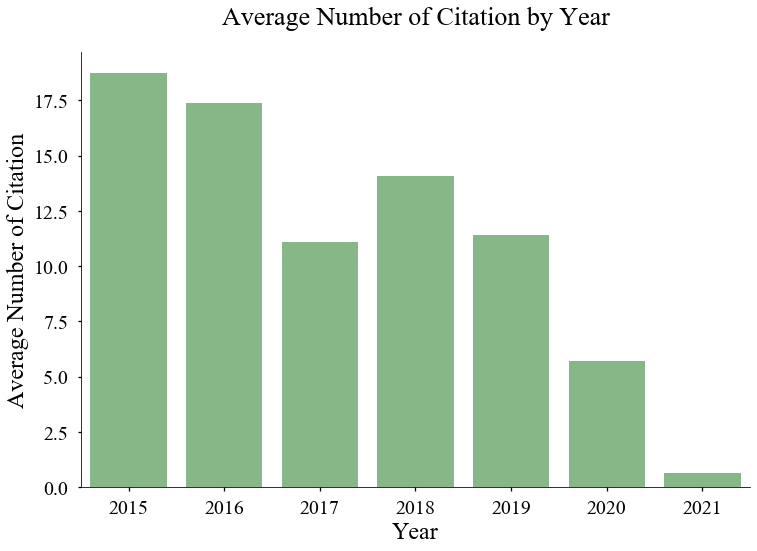

In [5]:
plt.figure(figsize=(12,8))

cit=sns.barplot(x=df_year.index, y="mean_citation", data=df_year,ci=None,
                 color="green",alpha=.5)

cit.set_xlabel("Year", fontsize = 24)
cit.set_ylabel("Average Number of Citation", fontsize = 24)
cit.set_title("Average Number of Citation by Year", fontsize = 26,y=1.05)
cit.tick_params(axis='both',labelsize=20)
sns.despine()
plt.show()

In [6]:
jou=pd.DataFrame(df['Source title'].value_counts())
top5_jou=jou.head(5)
top5_jou

,Source title
Sustainability (Switzerland),68
International Journal of Sustainable Transportation,12
Journal of Cleaner Production,12
Case Studies on Transport Policy,11
Journal of Transport Geography,11


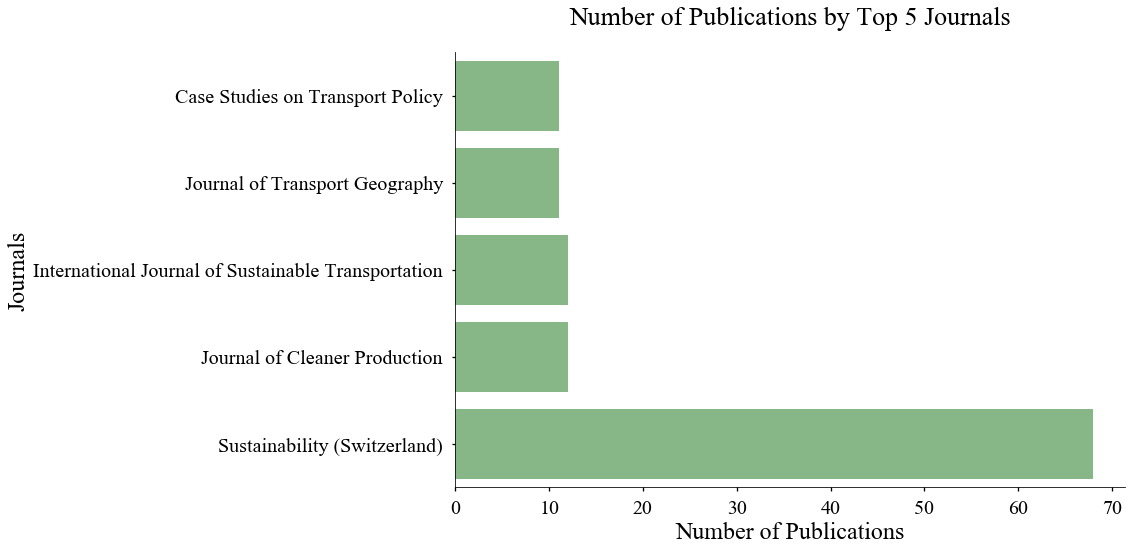

In [7]:
plt.figure(figsize=(12,8))

t5j=sns.barplot(x='Source title', y=top5_jou.index, data=top5_jou,ci=None,
                 color="green",alpha=.5,order=top5_jou.sort_values('Source title',ascending = True).index)

t5j.set_xlabel("Number of Publications", fontsize = 24)
t5j.set_ylabel("Journals", fontsize = 24)
t5j.set_title("Number of Publications by Top 5 Journals", fontsize = 26,y=1.05)
t5j.tick_params(axis='both',labelsize=20)
sns.despine()
plt.show()

In [8]:
publer=pd.DataFrame(df['Publisher'].value_counts())
top5_publer=publer.head(5)
top5_publer

,Publisher
Elsevier Ltd,116
MDPI AG,84
Taylor and Francis Ltd.,19
Emerald Group Holdings Ltd.,9
Elsevier B.V.,9


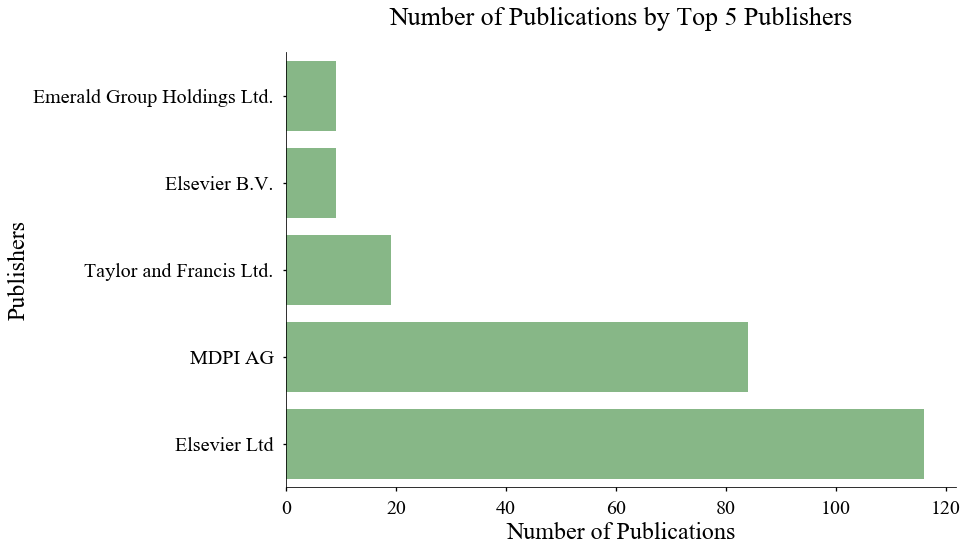

In [9]:
plt.figure(figsize=(12,8))

t5p=sns.barplot(x='Publisher', y=top5_publer.index, data=top5_publer,ci=None,
                 color="green",alpha=.5,order=top5_publer.sort_values('Publisher',ascending = True).index)

t5p.set_xlabel("Number of Publications", fontsize = 24)
t5p.set_ylabel("Publishers", fontsize = 24)
t5p.set_title("Number of Publications by Top 5 Publishers", fontsize = 26,y=1.05)
t5p.tick_params(axis='both',labelsize=20)
sns.despine()
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            358 non-null    object 
 1   Year             358 non-null    int64  
 2   Source title     358 non-null    object 
 3   Cited by         358 non-null    float64
 4   Link             358 non-null    object 
 5   Abstract         358 non-null    object 
 6   Author Keywords  346 non-null    object 
 7   Publisher        358 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 22.5+ KB


In [11]:
def token_keyword(content):
    content=str(content).lower()

    #transfer to ascii
    c=ftfy.fix_text(content)
     
    #remove non-ASCII characters    
#    clean_noascii=c.encode("ascii", "ignore").decode()
    
    #remove -\()\' and all more than one blank
    clean_noascii=" ".join(re.findall(r"^\w+\;\s?|\w+\;\s?|\w+", c)) 
    clean_content=re.sub(r'\s+', ' ', clean_noascii, flags=re.I)
    
   
    #tokenize keyword
    token_keyword=word_tokenize(clean_content)
    
    #remove stopword

    wordlst=[]
    for i in token_keyword:
        if i not in stop_words:
            wordlst.append(i)
    return wordlst
    


In [12]:
df['token_keyword']=df['Author Keywords'].apply(token_keyword)
#df.to_csv('df_112.csv')
df.head()

,Title,Year,Source title,Cited by,Link,Abstract,Author Keywords,Publisher,token_keyword
0,Evaluating the impact of urban design scenario...,2021,Sustainable Cities and Society,0.0,https://www.scopus.com/inward/record.uri?eid=2...,Walking accessibility planning is seen a power...,Accessibility; Exploratory scenarios; GIS; Ped...,Elsevier Ltd,"[accessibility, ;, exploratory, scenarios, ;, ..."
1,Thinking together and governance in transport ...,2021,International Journal of E-Planning Research,0.0,https://www.scopus.com/inward/record.uri?eid=2...,Sustainability issues challenge most conventio...,Community Detection Algorithm; Implementation ...,IGI Global,"[community, detection, algorithm, ;, implement..."
2,Technoeconomic analysis and environmental impa...,2021,World Electric Vehicle Journal,0.0,https://www.scopus.com/inward/record.uri?eid=2...,"In recent decades, urban air pollution has inc...",Electric vehicles; Environmental impact; Life-...,MDPI AG,"[electric, vehicles, ;, environmental, impact,..."
3,Multi-modal interactions on urban streets: New...,2021,Applied Geography,0.0,https://www.scopus.com/inward/record.uri?eid=2...,"New York, like many US cities has recently see...",Commercial vehicles; Gentrification; New York;...,Elsevier Ltd,"[commercial, vehicles, ;, gentrification, ;, n..."
4,Route prioritization of urban public transport...,2021,Renewable and Sustainable Energy Reviews,1.0,https://www.scopus.com/inward/record.uri?eid=2...,Electric vehicles have attracted increasing in...,Buses; CO2 emissions; Electric vehicle; Multi-...,Elsevier Ltd,"[buses, ;, co2, emissions, ;, electric, vehicl..."


In [13]:
#lemmatizing the clear word 

def lemmatization(content):    
    
    # lemmatize words (needed for calculating frequencies correctly )
    lemmatizer = WordNetLemmatizer() 
    wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
    pos_tagged_text = nltk.pos_tag(content)#
#    print(pos_tagged_text)


    lem_words=[lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text]
    return lem_words

    
print("Done")

Done


In [14]:
df['lem_token_keyword']=df['token_keyword'].apply(lemmatization)
df.head()

,Title,Year,Source title,Cited by,Link,Abstract,Author Keywords,Publisher,token_keyword,lem_token_keyword
0,Evaluating the impact of urban design scenario...,2021,Sustainable Cities and Society,0.0,https://www.scopus.com/inward/record.uri?eid=2...,Walking accessibility planning is seen a power...,Accessibility; Exploratory scenarios; GIS; Ped...,Elsevier Ltd,"[accessibility, ;, exploratory, scenarios, ;, ...","[accessibility, ;, exploratory, scenario, ;, g..."
1,Thinking together and governance in transport ...,2021,International Journal of E-Planning Research,0.0,https://www.scopus.com/inward/record.uri?eid=2...,Sustainability issues challenge most conventio...,Community Detection Algorithm; Implementation ...,IGI Global,"[community, detection, algorithm, ;, implement...","[community, detection, algorithm, ;, implement..."
2,Technoeconomic analysis and environmental impa...,2021,World Electric Vehicle Journal,0.0,https://www.scopus.com/inward/record.uri?eid=2...,"In recent decades, urban air pollution has inc...",Electric vehicles; Environmental impact; Life-...,MDPI AG,"[electric, vehicles, ;, environmental, impact,...","[electric, vehicle, ;, environmental, impact, ..."
3,Multi-modal interactions on urban streets: New...,2021,Applied Geography,0.0,https://www.scopus.com/inward/record.uri?eid=2...,"New York, like many US cities has recently see...",Commercial vehicles; Gentrification; New York;...,Elsevier Ltd,"[commercial, vehicles, ;, gentrification, ;, n...","[commercial, vehicle, ;, gentrification, ;, ne..."
4,Route prioritization of urban public transport...,2021,Renewable and Sustainable Energy Reviews,1.0,https://www.scopus.com/inward/record.uri?eid=2...,Electric vehicles have attracted increasing in...,Buses; CO2 emissions; Electric vehicle; Multi-...,Elsevier Ltd,"[buses, ;, co2, emissions, ;, electric, vehicl...","[bus, ;, co2, emission, ;, electric, vehicle, ..."


In [15]:
#stemming the clear word 
   
def snowball_stemming(content):

    snow_stemmer=SnowballStemmer(language='english')
    stem_lem_words = []
#    i=' '.join(re.findall(r"\w+",str(content)))
#    c=word_tokenize(i)
    stem_lem_words=[snow_stemmer.stem(x) for x in content]
    return stem_lem_words
    
print("Done")

Done


In [16]:
df['stem_token_keyword']=df['token_keyword'].apply(snowball_stemming)
df.head()

,Title,Year,Source title,Cited by,Link,Abstract,Author Keywords,Publisher,token_keyword,lem_token_keyword,stem_token_keyword
0,Evaluating the impact of urban design scenario...,2021,Sustainable Cities and Society,0.0,https://www.scopus.com/inward/record.uri?eid=2...,Walking accessibility planning is seen a power...,Accessibility; Exploratory scenarios; GIS; Ped...,Elsevier Ltd,"[accessibility, ;, exploratory, scenarios, ;, ...","[accessibility, ;, exploratory, scenario, ;, g...","[access, ;, exploratori, scenario, ;, gis, ;, ..."
1,Thinking together and governance in transport ...,2021,International Journal of E-Planning Research,0.0,https://www.scopus.com/inward/record.uri?eid=2...,Sustainability issues challenge most conventio...,Community Detection Algorithm; Implementation ...,IGI Global,"[community, detection, algorithm, ;, implement...","[community, detection, algorithm, ;, implement...","[communiti, detect, algorithm, ;, implement, p..."
2,Technoeconomic analysis and environmental impa...,2021,World Electric Vehicle Journal,0.0,https://www.scopus.com/inward/record.uri?eid=2...,"In recent decades, urban air pollution has inc...",Electric vehicles; Environmental impact; Life-...,MDPI AG,"[electric, vehicles, ;, environmental, impact,...","[electric, vehicle, ;, environmental, impact, ...","[electr, vehicl, ;, environment, impact, ;, li..."
3,Multi-modal interactions on urban streets: New...,2021,Applied Geography,0.0,https://www.scopus.com/inward/record.uri?eid=2...,"New York, like many US cities has recently see...",Commercial vehicles; Gentrification; New York;...,Elsevier Ltd,"[commercial, vehicles, ;, gentrification, ;, n...","[commercial, vehicle, ;, gentrification, ;, ne...","[commerci, vehicl, ;, gentrif, ;, new, york, ;..."
4,Route prioritization of urban public transport...,2021,Renewable and Sustainable Energy Reviews,1.0,https://www.scopus.com/inward/record.uri?eid=2...,Electric vehicles have attracted increasing in...,Buses; CO2 emissions; Electric vehicle; Multi-...,Elsevier Ltd,"[buses, ;, co2, emissions, ;, electric, vehicl...","[bus, ;, co2, emission, ;, electric, vehicle, ...","[buse, ;, co2, emiss, ;, electr, vehicl, ;, mu..."


In [17]:
df['lem_stem_token_keyword']=df['lem_token_keyword'].apply(snowball_stemming)
df['lem_stem_token_keyword_2']=df.lem_stem_token_keyword.apply(lambda x: ' '.join(c for c in x if c not in string.punctuation)).apply(lambda x: re.sub(r"\bnan\b",'',str(x))).apply(lambda x: word_tokenize(x))

#df.to_csv('df_212.csv')
df.head()

,Title,Year,Source title,Cited by,Link,Abstract,Author Keywords,Publisher,token_keyword,lem_token_keyword,stem_token_keyword,lem_stem_token_keyword,lem_stem_token_keyword_2
0,Evaluating the impact of urban design scenario...,2021,Sustainable Cities and Society,0.0,https://www.scopus.com/inward/record.uri?eid=2...,Walking accessibility planning is seen a power...,Accessibility; Exploratory scenarios; GIS; Ped...,Elsevier Ltd,"[accessibility, ;, exploratory, scenarios, ;, ...","[accessibility, ;, exploratory, scenario, ;, g...","[access, ;, exploratori, scenario, ;, gis, ;, ...","[access, ;, exploratori, scenario, ;, gi, ;, p...","[access, exploratori, scenario, gi, pedestrian..."
1,Thinking together and governance in transport ...,2021,International Journal of E-Planning Research,0.0,https://www.scopus.com/inward/record.uri?eid=2...,Sustainability issues challenge most conventio...,Community Detection Algorithm; Implementation ...,IGI Global,"[community, detection, algorithm, ;, implement...","[community, detection, algorithm, ;, implement...","[communiti, detect, algorithm, ;, implement, p...","[communiti, detect, algorithm, ;, implement, p...","[communiti, detect, algorithm, implement, path..."
2,Technoeconomic analysis and environmental impa...,2021,World Electric Vehicle Journal,0.0,https://www.scopus.com/inward/record.uri?eid=2...,"In recent decades, urban air pollution has inc...",Electric vehicles; Environmental impact; Life-...,MDPI AG,"[electric, vehicles, ;, environmental, impact,...","[electric, vehicle, ;, environmental, impact, ...","[electr, vehicl, ;, environment, impact, ;, li...","[electr, vehicl, ;, environment, impact, ;, li...","[electr, vehicl, environment, impact, life, cy..."
3,Multi-modal interactions on urban streets: New...,2021,Applied Geography,0.0,https://www.scopus.com/inward/record.uri?eid=2...,"New York, like many US cities has recently see...",Commercial vehicles; Gentrification; New York;...,Elsevier Ltd,"[commercial, vehicles, ;, gentrification, ;, n...","[commercial, vehicle, ;, gentrification, ;, ne...","[commerci, vehicl, ;, gentrif, ;, new, york, ;...","[commerci, vehicl, ;, gentrif, ;, new, york, ;...","[commerci, vehicl, gentrif, new, york, sustain..."
4,Route prioritization of urban public transport...,2021,Renewable and Sustainable Energy Reviews,1.0,https://www.scopus.com/inward/record.uri?eid=2...,Electric vehicles have attracted increasing in...,Buses; CO2 emissions; Electric vehicle; Multi-...,Elsevier Ltd,"[buses, ;, co2, emissions, ;, electric, vehicl...","[bus, ;, co2, emission, ;, electric, vehicle, ...","[buse, ;, co2, emiss, ;, electr, vehicl, ;, mu...","[bus, ;, co2, emiss, ;, electr, vehicl, ;, mul...","[bus, co2, emiss, electr, vehicl, multi, crite..."


In [18]:
##top 5 key words after lem and stem

cnt_kw = Counter()

for i in df['lem_stem_token_keyword_2']:

    for word in i:
        cnt_kw[word]+=1

print(len(cnt_kw))        
print(cnt_kw.most_common())

978
[('transport', 265), ('sustain', 257), ('mobil', 126), ('urban', 64), ('analysi', 63), ('plan', 59), ('vehicl', 52), ('public', 49), ('system', 49), ('electr', 38), ('model', 38), ('transit', 34), ('polici', 32), ('develop', 32), ('travel', 32), ('manag', 32), ('decis', 31), ('network', 30), ('energi', 29), ('multi', 26), ('cycl', 25), ('emiss', 25), ('citi', 24), ('share', 23), ('access', 22), ('traffic', 22), ('environment', 20), ('infrastructur', 20), ('cost', 19), ('assess', 19), ('design', 18), ('criterion', 18), ('road', 18), ('bicycl', 17), ('make', 17), ('econom', 16), ('chang', 16), ('use', 16), ('car', 15), ('spatial', 15), ('behavior', 15), ('mode', 15), ('choic', 15), ('demand', 15), ('smart', 15), ('impact', 14), ('rout', 14), ('integr', 14), ('bus', 13), ('base', 13), ('optim', 13), ('green', 13), ('pedestrian', 12), ('activ', 12), ('studi', 12), ('fuzzi', 12), ('land', 12), ('evalu', 12), ('benefit', 12), ('bike', 11), ('data', 11), ('simul', 11), ('gi', 10), ('walk'

In [19]:
df['lem_stem_token_keyword_combined']=df['lem_stem_token_keyword'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
df['transport']=df.lem_stem_token_keyword_combined.apply(lambda x: re.findall(r"[a-z0-9_ ]{0,50}transport[a-z0-9_ ]{0,50}",str(x.split('; '))))
df['sustain']=df.lem_stem_token_keyword_combined.apply(lambda x: re.findall(r"[a-z0-9_ ]{0,50}sustain[a-z0-9_ ]{0,50}",str(x.split('; '))))
df['mobil']=df.lem_stem_token_keyword_combined.apply(lambda x: re.findall(r"[a-z0-9_ ]{0,50}mobil[a-z0-9_ ]{0,50}",str(x.split('; '))))
df['urban']=df.lem_stem_token_keyword_combined.apply(lambda x: re.findall(r"[a-z0-9_ ]{0,50}urban[a-z0-9_ ]{0,50}",str(x.split('; '))))
df['analysi']=df.lem_stem_token_keyword_combined.apply(lambda x: re.findall(r"[a-z0-9_ ]{0,50}analysi[a-z0-9_ ]{0,50}",str(x.split('; '))))

df.to_csv('df_312.csv')
df.head()

,Title,Year,Source title,Cited by,Link,Abstract,Author Keywords,Publisher,token_keyword,lem_token_keyword,stem_token_keyword,lem_stem_token_keyword,lem_stem_token_keyword_2,lem_stem_token_keyword_combined,transport,sustain,mobil,urban,analysi
0,Evaluating the impact of urban design scenario...,2021,Sustainable Cities and Society,0.0,https://www.scopus.com/inward/record.uri?eid=2...,Walking accessibility planning is seen a power...,Accessibility; Exploratory scenarios; GIS; Ped...,Elsevier Ltd,"[accessibility, ;, exploratory, scenarios, ;, ...","[accessibility, ;, exploratory, scenario, ;, g...","[access, ;, exploratori, scenario, ;, gis, ;, ...","[access, ;, exploratori, scenario, ;, gi, ;, p...","[access, exploratori, scenario, gi, pedestrian...",access; exploratori scenario; gi; pedestrian m...,[],[],[pedestrian mobil],[urban design],[]
1,Thinking together and governance in transport ...,2021,International Journal of E-Planning Research,0.0,https://www.scopus.com/inward/record.uri?eid=2...,Sustainability issues challenge most conventio...,Community Detection Algorithm; Implementation ...,IGI Global,"[community, detection, algorithm, ;, implement...","[community, detection, algorithm, ;, implement...","[communiti, detect, algorithm, ;, implement, p...","[communiti, detect, algorithm, ;, implement, p...","[communiti, detect, algorithm, implement, path...",communiti detect algorithm; implement pathway;...,[transport polici packag],[sustain mobil],[sustain mobil],[],[structur analysi]
2,Technoeconomic analysis and environmental impa...,2021,World Electric Vehicle Journal,0.0,https://www.scopus.com/inward/record.uri?eid=2...,"In recent decades, urban air pollution has inc...",Electric vehicles; Environmental impact; Life-...,MDPI AG,"[electric, vehicles, ;, environmental, impact,...","[electric, vehicle, ;, environmental, impact, ...","[electr, vehicl, ;, environment, impact, ;, li...","[electr, vehicl, ;, environment, impact, ;, li...","[electr, vehicl, environment, impact, life, cy...",electr vehicl; environment impact; life cycl c...,[public transport],[sustain mobil],[sustain mobil],[],[]
3,Multi-modal interactions on urban streets: New...,2021,Applied Geography,0.0,https://www.scopus.com/inward/record.uri?eid=2...,"New York, like many US cities has recently see...",Commercial vehicles; Gentrification; New York;...,Elsevier Ltd,"[commercial, vehicles, ;, gentrification, ;, n...","[commercial, vehicle, ;, gentrification, ;, ne...","[commerci, vehicl, ;, gentrif, ;, new, york, ;...","[commerci, vehicl, ;, gentrif, ;, new, york, ;...","[commerci, vehicl, gentrif, new, york, sustain...",commerci vehicl; gentrif; new york; sustain tr...,"[sustain transport, transport collis]",[sustain transport],[],[],[]
4,Route prioritization of urban public transport...,2021,Renewable and Sustainable Energy Reviews,1.0,https://www.scopus.com/inward/record.uri?eid=2...,Electric vehicles have attracted increasing in...,Buses; CO2 emissions; Electric vehicle; Multi-...,Elsevier Ltd,"[buses, ;, co2, emissions, ;, electric, vehicl...","[bus, ;, co2, emission, ;, electric, vehicle, ...","[buse, ;, co2, emiss, ;, electr, vehicl, ;, mu...","[bus, ;, co2, emiss, ;, electr, vehicl, ;, mul...","[bus, co2, emiss, electr, vehicl, multi, crite...",bus; co2 emiss; electr vehicl; multi criterion...,[sustain transport],[sustain transport],[],[],[]


In [20]:
##top 3 key words of transport

cnt_transport = Counter()

for i in df.transport:

    for word in i:
        cnt_transport[word]+=1
print('cnt_transport')
print(len(cnt_transport))        
print(cnt_transport.most_common(3))

##top 3 key words of sustain

cnt_sustain = Counter()

for i in df.sustain:

    for word in i:
        cnt_sustain[word]+=1

print('cnt_sustain')     
print(len(cnt_sustain))        
print(cnt_sustain.most_common(3))

##top 3 key words of mobil

cnt_mobil = Counter()

for i in df.mobil:

    for word in i:
        cnt_mobil[word]+=1

print('cnt_mobil')     
print(len(cnt_mobil))        
print(cnt_mobil.most_common(3))


##top 3 key words of urban

cnt_urban = Counter()

for i in df.urban:

    for word in i:
        cnt_urban[word]+=1
print('cnt_urban')
print(len(cnt_urban))        
print(cnt_urban.most_common())



##top 3 key words of analysi

cnt_analysi = Counter()

for i in df.analysi:

    for word in i:
        cnt_analysi[word]+=1
print('cnt_analysi')
print(len(cnt_analysi))        
print(cnt_analysi.most_common())

cnt_transport
97
[('sustain transport', 79), ('transport', 23), ('public transport', 22)]
cnt_sustain
67
[('sustain transport', 79), ('sustain mobil', 59), ('sustain', 30)]
cnt_mobil
46
[('sustain mobil', 59), ('mobil', 7), ('mobil manag', 4)]
cnt_urban
47
[('urban transport', 4), ('sustain urban mobil', 4), ('urban mobil', 4), ('urban', 4), ('urban sustain', 2), ('urban transport infrastructur', 2), ('urban mobil plan', 2), ('urban plan', 2), ('urban design', 1), ('lisbon portug urban street network', 1), ('urban transform', 1), ('sustain urban mobil plan', 1), ('urban public tran port', 1), ('rural urban', 1), ('healthi urban plan', 1), ('urban health', 1), ('urban econom', 1), ('urban map', 1), ('urban spatial transform', 1), ('urban mobil polici', 1), ('urban develop', 1), ('urban cycl lane', 1), ('urban rail train', 1), ('urban traffic network', 1), ('tactic urban', 1), ('brazilian urban mobil polici', 1), ('urban peri urban mobil', 1), ('urban develop process', 1), ('smart urban 